### Part 2-3 : Subway stations and number of nearby aparaments
#### In the previous part, we obtained the number of apartments in the neighborhood <br>for each station, and we will examine the distribution of the number of apartments and the situation for each station.

In [1]:
import pandas as pd
import numpy as np

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium # map rendering library

import matplotlib.pyplot as plt

In [2]:
df0 = pd.read_csv('station.csv')

In [3]:
df0.shape

(473, 6)

In [4]:
df0.columns

Index(['Unnamed: 0', 'Station_Name', 'LINE', 'lat', 'lng', 'numuni'], dtype='object')

In [5]:
df0.max()

Unnamed: 0             472
Station_Name    Zerega Ave
LINE                     S
lat                40.9031
lng               -73.7554
numuni                  71
dtype: object

In [6]:
df0.groupby('numuni').count()

,Unnamed: 0,Station_Name,LINE,lat,lng
numuni,,,,,
0,135,135,135,135,135
1,67,67,67,67,67
2,26,26,26,26,26
3,13,13,13,13,13
4,17,17,17,17,17
5,15,15,15,15,15
6,11,11,11,11,11
7,6,6,6,6,6
8,12,12,12,12,12


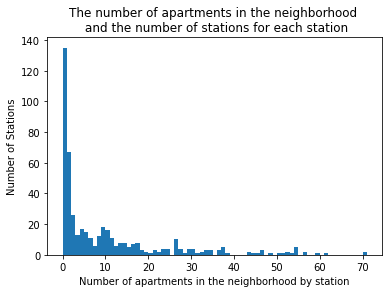

In [7]:
# historgam
data = np.array(df0['numuni'])
 
hist, bin_edges = np.histogram(data, bins=71)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(data, bins=71)
plt.xlabel("Number of apartments in the neighborhood by station")
plt.ylabel("Number of Stations")
plt.title("The number of apartments in the neighborhood \n and the number of stations for each station")
plt.show()

#### Looking at the number of apartments in the neighborhood for each station, there <br>are 135 stations with no apartments in the neighborhood, which is about 30% of the total number of stations.



#### This distribution appears to be a power distribution, which I would like to examine if I get a chance.


In [8]:
address = 'New York, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York are 40.7127281, -74.0060152.


#### To show the number of apartments in the neighborhood for each station, the stations were colored by the number of apartments.
- If there are no apartments, the color is Black.
- Blue for 1 to 10 apartments,
- Green for 11 to 30 apartments, 
- Yellow for 31 to 50 apartments, 
- Red for 51 or more

In [9]:
map_ny = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label, p in zip(df0['lat'], df0['lng'], df0['Station_Name'],df0['numuni']):
    label = folium.Popup(label, parse_html=True)

    if p == 0 : clr = 'black'
    if p >= 1 : clr = 'blue'
    if p >= 11 : clr = 'green'
    if p >= 31 : clr = 'yellow'    
    if p >= 50 : clr = 'red'

    folium.CircleMarker(
        [lat, lng],
        radius=2.0,
        popup=label,
        color=clr,
        fill=True,
        fill_opacity=1.0,
        parse_html=False).add_to(map_ny)  
    
map_ny

#### The area with the highest number of cases is Lower Manhattan and adjacent Brooklyn.
